In [62]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import linregress
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import kendalltau
verdict_df = pd.read_csv("Outputs/Outpatient_State_Imaging_Efficiency.csv")
readmission_perfomance_of_state = pd.read_csv('Outputs/readmission_perfomance_of_state.csv')
healthcare_infections_pd = pd.read_csv("Outputs/Healthcare_Associated_Infections-State-clean.csv")
healthcare_spending_pd = pd.read_csv("Outputs/Medicare_Hospital_Spending_Per_Patient-State-clean.csv")
spending_per_patient = pd.read_csv('Outputs/Medicare_Hospital_Spending_Per_Patient-State-clean.csv')
infections_mean = pd.read_csv("Outputs/Healthcare_Associated_Infections-State-clean.csv")


In [90]:
# merge the dataframes
merge_df = pd.merge(verdict_df, readmission_perfomance_of_state, on="State")
merge_df = pd.merge(merge_df, healthcare_infections_pd, on="State")
merge_df = pd.merge(merge_df, healthcare_spending_pd, on="State")
merge_df = pd.merge(merge_df, spending_per_patient_state, on="State")
merge_df = pd.merge(merge_df, infections_mean, on="State")

#delete the columns that are not needed
del merge_df['SIR Average_x']
del merge_df['Score_x']

#rename the columns
merge_df = merge_df.rename(columns={"SIR Average_y": "SIR Average", "Score_y": "Score", 'Average State Score': 'Average State Efficiency Score', 
                                    'Average National Score': 'Average National Efficiency Score',
                                    'Number of Hospitals Worse': 'Number of Hospitals Worse for Readmisson rates',
                                    'Number of Hospitals Better': 'Number of Hospitals Better for Readmisson rates',
                                    'Number of Hospitals Too Few': 'Number of Hospitals Too Few for Readmisson rates',
                                    'Verdict': 'State Efficiency Verdict',
                                    '% Outstanding Hospitals': '% Outstanding Hospitals(with low Readmisson rates)',
                                    '% Under Performing': '% Under Performing Hospitals(with high Readmisson rates)',
                                    '% Average Performance': '% Average Hospitals(with same Readmisson rates as National average)'})
merge_df.set_index('State', inplace=True)


merge_df.head()

,Average State Efficiency Score,Average National Efficiency Score,State Efficiency Verdict,Number of Hospitals Worse for Readmisson rates,Number of Hospitals Same,Number of Hospitals Better for Readmisson rates,Number of Hospitals Too Few for Readmisson rates,Total Hospitals,% Outstanding Hospitals(with low Readmisson rates),% Under Performing Hospitals(with high Readmisson rates),% Average Hospitals(with same Readmisson rates as National average),Score,SIR Average
State,,,,,,,,,,,,,
AK,14.900,14.025,Inefficient,0.0,61.0,1.0,46.0,108.0,0.93,0.00,56.48,0.92,0.901000
AL,15.150,14.025,Inefficient,1.0,347.0,0.0,137.0,485.0,0.00,0.21,71.55,0.96,0.907000
AR,14.700,14.025,Inefficient,4.0,283.0,3.0,122.0,412.0,0.73,0.97,68.69,1.00,0.799333
AZ,13.175,14.025,Efficient,5.0,319.0,9.0,122.0,455.0,1.98,1.10,70.11,0.94,0.729500
CA,14.375,14.025,Inefficient,31.0,1397.0,16.0,521.0,1965.0,0.81,1.58,71.09,1.00,0.804667


In [108]:
# Finding the top performing hospitals based on the readmission rate
top_performing_hospitals = merge_df.sort_values('% Outstanding Hospitals(with low Readmisson rates)', ascending=False)
top_performing_hospitals.head(10)

,Average State Efficiency Score,Average National Efficiency Score,State Efficiency Verdict,Number of Hospitals Worse for Readmisson rates,Number of Hospitals Same,Number of Hospitals Better for Readmisson rates,Number of Hospitals Too Few for Readmisson rates,Total Hospitals,% Outstanding Hospitals(with low Readmisson rates),% Under Performing Hospitals(with high Readmisson rates),% Average Hospitals(with same Readmisson rates as National average),Score,SIR Average
State,,,,,,,,,,,,,
HI,11.575,14.025,Efficient,0.0,50.0,5.0,36.0,91.0,5.49,0.00,54.95,0.93,0.599833
ID,13.850,14.025,Efficient,0.0,123.0,9.0,101.0,233.0,3.86,0.00,52.79,0.97,0.971833
WA,13.025,14.025,Efficient,1.0,318.0,19.0,165.0,503.0,3.78,0.20,63.22,0.92,0.851667
ME,13.375,14.025,Efficient,1.0,121.0,7.0,70.0,199.0,3.52,0.50,60.80,0.93,0.836833
UT,14.800,14.025,Inefficient,0.0,147.0,9.0,101.0,257.0,3.50,0.00,57.20,0.94,0.729000
DE,11.150,14.025,Efficient,0.0,41.0,1.0,2.0,44.0,2.27,0.00,93.18,1.02,0.716000
SD,12.300,14.025,Efficient,1.0,119.0,6.0,164.0,290.0,2.07,0.34,41.03,0.93,0.872000
NC,12.750,14.025,Efficient,6.0,494.0,13.0,119.0,632.0,2.06,0.95,78.16,0.95,0.872500
OR,14.675,14.025,Inefficient,0.0,232.0,7.0,109.0,348.0,2.01,0.00,66.67,0.89,0.793500


In [93]:
# Finding the under performing hospitals based on the readmission rate
under_performing_hospitals = merge_df.sort_values('% Under Performing Hospitals(with high Readmisson rates)', ascending=False)
under_performing_hospitals.head(10)

,Average State Efficiency Score,Average National Efficiency Score,State Efficiency Verdict,Number of Hospitals Worse for Readmisson rates,Number of Hospitals Same,Number of Hospitals Better for Readmisson rates,Number of Hospitals Too Few for Readmisson rates,Total Hospitals,% Outstanding Hospitals(with low Readmisson rates),% Under Performing Hospitals(with high Readmisson rates),% Average Hospitals(with same Readmisson rates as National average),Score,SIR Average
State,,,,,,,,,,,,,
MA,12.975,14.025,Efficient,30.0,284.0,2.0,40.0,356.0,0.56,8.43,79.78,0.98,0.786333
NJ,15.725,14.025,Inefficient,22.0,330.0,7.0,43.0,402.0,1.74,5.47,82.09,1.07,0.808667
FL,14.450,14.025,Inefficient,48.0,946.0,13.0,160.0,1167.0,1.11,4.11,81.06,1.01,0.708500
RI,13.575,14.025,Efficient,2.0,50.0,0.0,9.0,61.0,0.00,3.28,81.97,0.99,0.644333
NY,19.075,14.025,Inefficient,29.0,743.0,9.0,200.0,981.0,0.92,2.96,75.74,1.02,0.822833
DC,12.550,14.025,Efficient,1.0,39.0,0.0,3.0,43.0,0.00,2.33,90.70,1.02,0.957000
IL,14.350,14.025,Inefficient,23.0,775.0,2.0,260.0,1060.0,0.19,2.17,73.11,1.00,0.777833
NV,13.825,14.025,Efficient,4.0,157.0,2.0,50.0,213.0,0.94,1.88,73.71,1.03,0.770500
MI,13.700,14.025,Efficient,13.0,539.0,12.0,190.0,754.0,1.59,1.72,71.49,0.94,0.965000


In [94]:
efficiency_verdicts = merge_df[['Average State Efficiency Score', 'Average National Efficiency Score', 'State Efficiency Verdict']]
efficiency_verdicts = efficiency_verdicts.sort_values('Average State Efficiency Score', ascending=True)
efficiency_verdicts.head(10)

,Average State Efficiency Score,Average National Efficiency Score,State Efficiency Verdict
State,,,
DE,11.150,14.025,Efficient
HI,11.575,14.025,Efficient
IA,12.175,14.025,Efficient
VT,12.250,14.025,Efficient
SD,12.300,14.025,Efficient
DC,12.550,14.025,Efficient
VA,12.675,14.025,Efficient
NC,12.750,14.025,Efficient
OH,12.875,14.025,Efficient


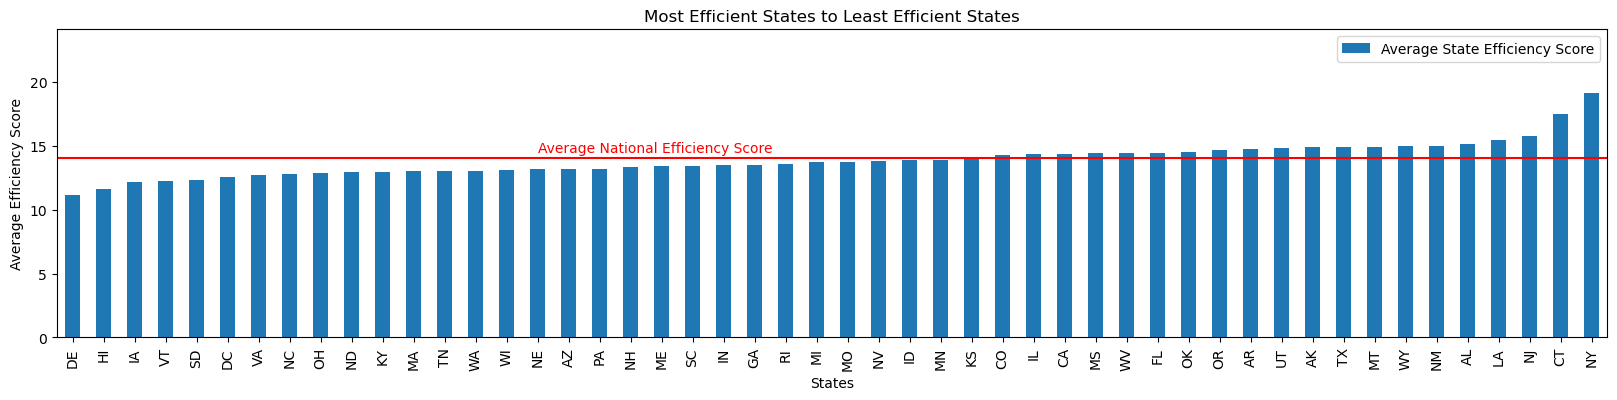

In [95]:
# Plot BarChart showing the most efficient state to least efficent states (left to right)
most_efficient_plot = efficiency_verdicts["Average State Efficiency Score"].plot(kind="bar", figsize=(20,4), ylabel="Average Efficiency Score", xlabel="States")
plt.hlines(y=14.025, xmin=-1, xmax=51.5, colors="red")
plt.text(15, 14.5, "Average National Efficiency Score", color="red")
plt.legend(loc="upper right")
plt.title("Most Efficient States to Least Efficient States")
plt.ylim(0, max(efficiency_verdicts["Average State Efficiency Score"]+5))
plt.savefig("Visualizations/Most_Efficient_States_to_Least_Efficient_States.png")
plt.show()


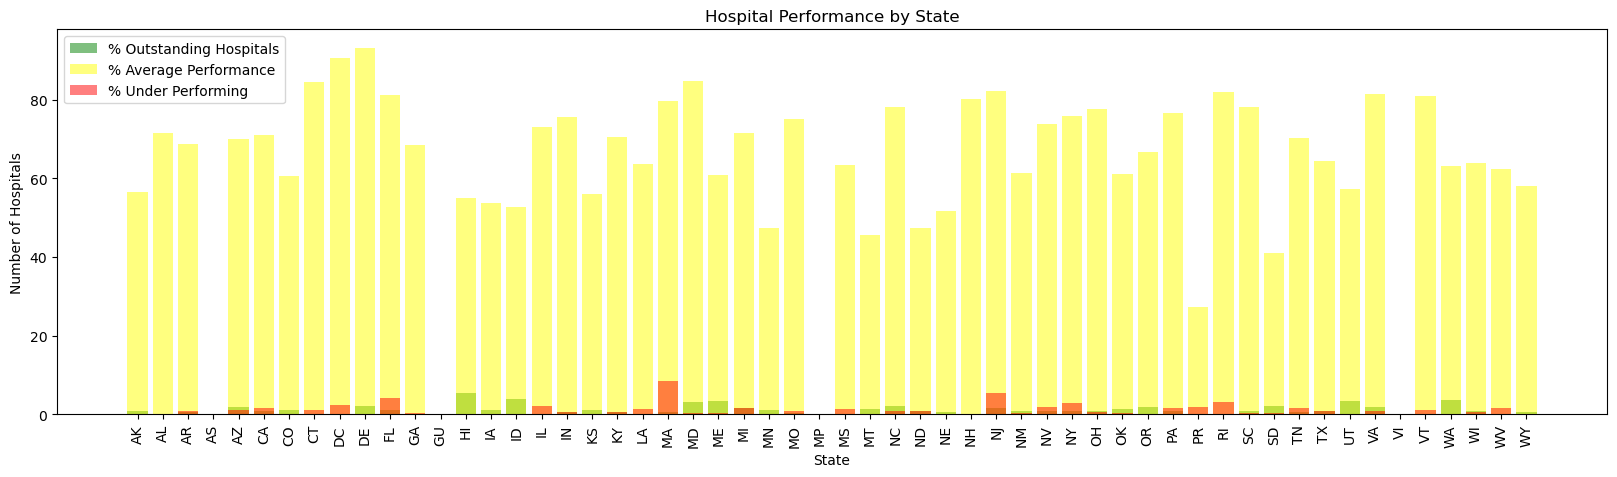

In [96]:
states = readmission_perfomance_of_state['State']
# Plot a bar graph to show the performance of hospitals in each state side by side with the national average
fig, ax = plt.subplots(figsize=(20,5))
x_axis = np.arange(len(states))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, states, rotation=90)
plt.bar(x_axis, readmission_perfomance_of_state['% Outstanding Hospitals'], color='green', alpha=0.5, align="center")
plt.bar(x_axis, readmission_perfomance_of_state['% Average Performance'], color='yellow', alpha=0.5, align="center")
plt.bar(x_axis, readmission_perfomance_of_state['% Under Performing'], color='red', alpha=0.5, align="center")
plt.legend(['% Outstanding Hospitals', '% Average Performance', '% Under Performing'], loc='best')
plt.title('Hospital Performance by State')
plt.ylabel('Number of Hospitals')
plt.xlabel('State')
plt.savefig('Visualizations/Hospital_Performance_by_State.png')
plt.show()



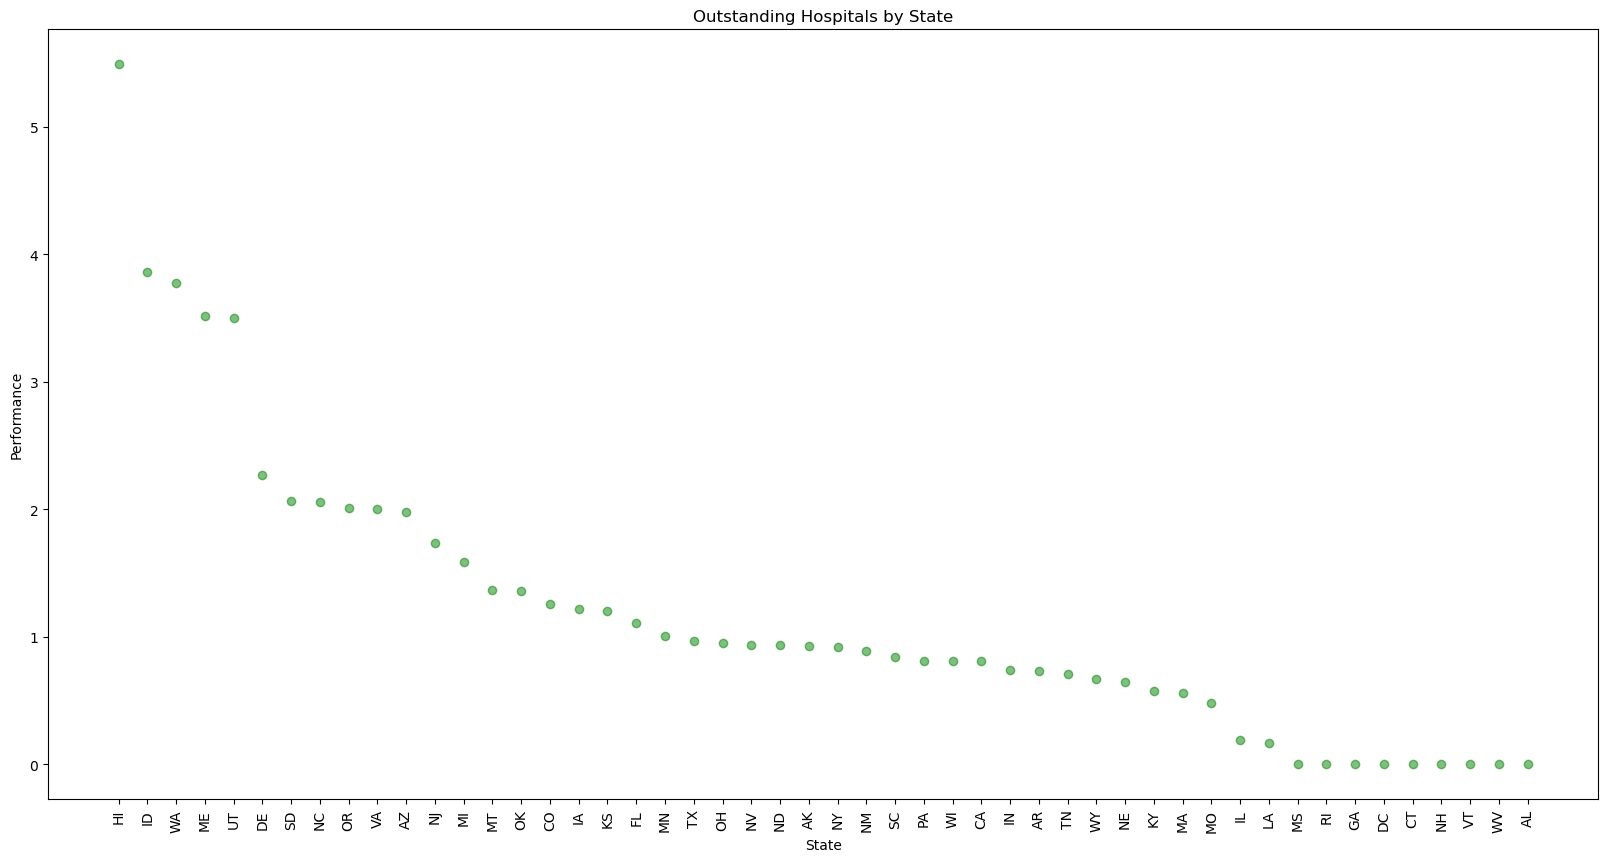

In [105]:
#Plot scatter plot to show Outstanding hospitals vs State
plt.figure(figsize=(20,10))
plt.scatter(top_performing_hospitals.index, top_performing_hospitals['% Outstanding Hospitals(with low Readmisson rates)'], color='green', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Outstanding Hospitals by State")
plt.xlabel("State")
plt.ylabel("Performance")
plt.savefig("Visualizations/Outstanding_Hospitals_by_State.png")
plt.show()

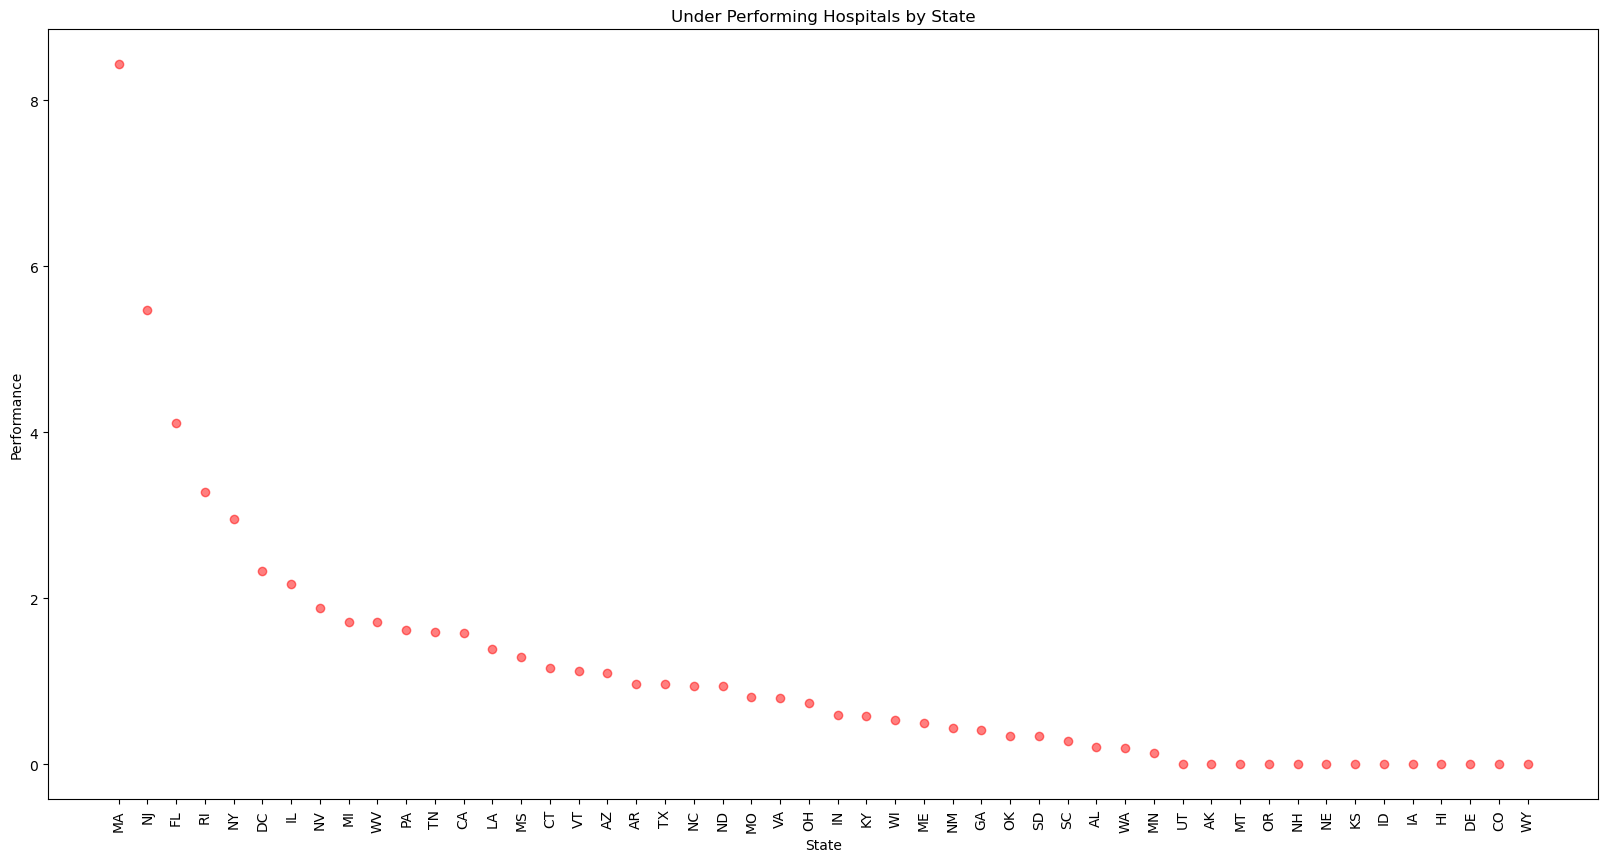

In [100]:
#Plot scatter plot to show Under Performing hospitals vs State
plt.figure(figsize=(20,10))
plt.scatter(under_performing_hospitals.index, under_performing_hospitals['% Under Performing Hospitals(with high Readmisson rates)'], color='red', alpha=0.5)
plt.xticks(rotation=90)
plt.title("Under Performing Hospitals by State")
plt.xlabel("State")
plt.ylabel("Performance")
plt.savefig("Visualizations/Under_Performing_Hospitals_by_State.png")
plt.show()

In [ ]:
# Spending per patient vs State Efficiency Score based on the national average spending per patient
# Drop the columns that are not needed and keep state and score
spending_per_patient_state = spending_per_patient[['State', 'Score']]

# Convert the score column to a numeric value
spending_per_patient_state['Score'] = pd.to_numeric(spending_per_patient_state['Score'], errors='coerce')

# Convert NaN values to 0
spending_per_patient_state = spending_per_patient_state.fillna(0)
spending_per_patient_state.head()


,State,Score
0,AK,0.92
1,AL,0.96
2,AR,1.00
3,AZ,0.94
4,CA,1.00


<Axes: title={'center': 'Medicare Hospital Spending per Patient - State'}, xlabel='State', ylabel='Score'>

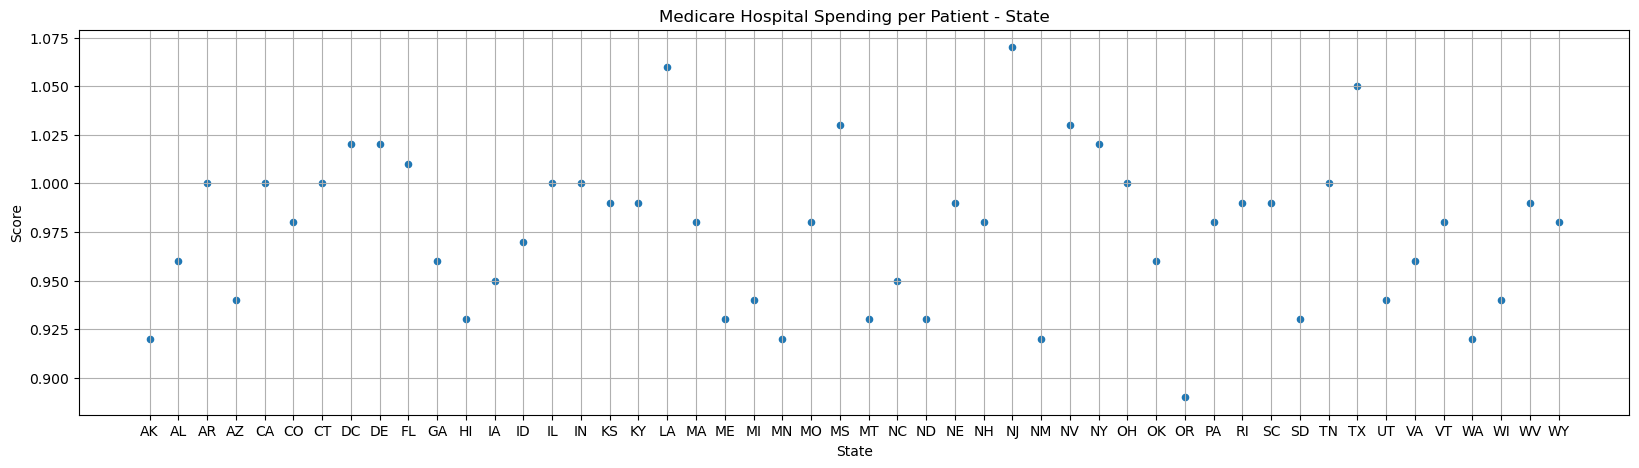

In [ ]:
# Filter out states with 0 scores
spending_per_patient_state = spending_per_patient_state.loc[spending_per_patient_state['Score'] != 0]

# Create a scatterplot of the data using the index as the x-axis and the score as the y-axis
spending_per_patient_state.plot(kind='scatter', x='State', y='Score', figsize=(20,5), grid=True, title='Medicare Hospital Spending per Patient - State')

In [ ]:
# Find the mean, median, and mode of the score
mean = spending_per_patient_state['Score'].mean()
median = spending_per_patient_state['Score'].median()
mode = spending_per_patient_state['Score'].mode()
print(f'The mean is {mean}')
print(f'The median is {median}')
print(f'The mode is {mode}')

The mean is 0.976
The median is 0.98
The mode is 0    0.98
1    1.00
Name: Score, dtype: float64


Text(0, 0.5, 'Spending per Patient')

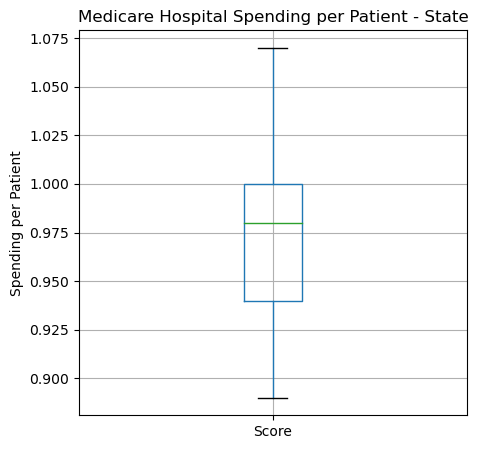

In [ ]:
# Create a boxplot to find outliers
spending_per_patient_state.boxplot(column=['Score'], figsize=(5,5))

# Add title and labels to the boxplot
plt.title('Medicare Hospital Spending per Patient - State')
plt.ylabel('Spending per Patient')


<Axes: >

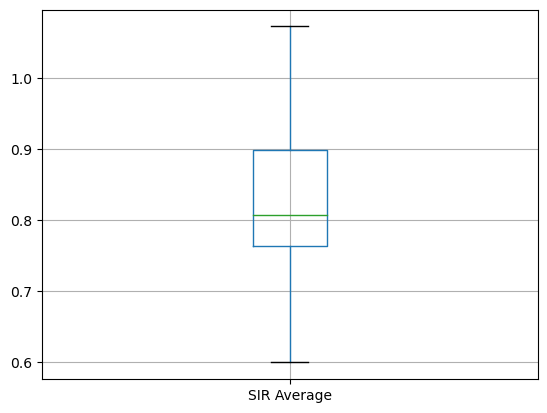

In [ ]:
#Create a boxplot to find outliers for infections
infections_mean.boxplot(column='SIR Average')